<a href="https://colab.research.google.com/github/neethu2602/DSA_Class_Activities-/blob/main/iris_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
data=data.drop('species',axis=1)
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
data.shape

(150, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Figure size 1000x600 with 0 Axes>

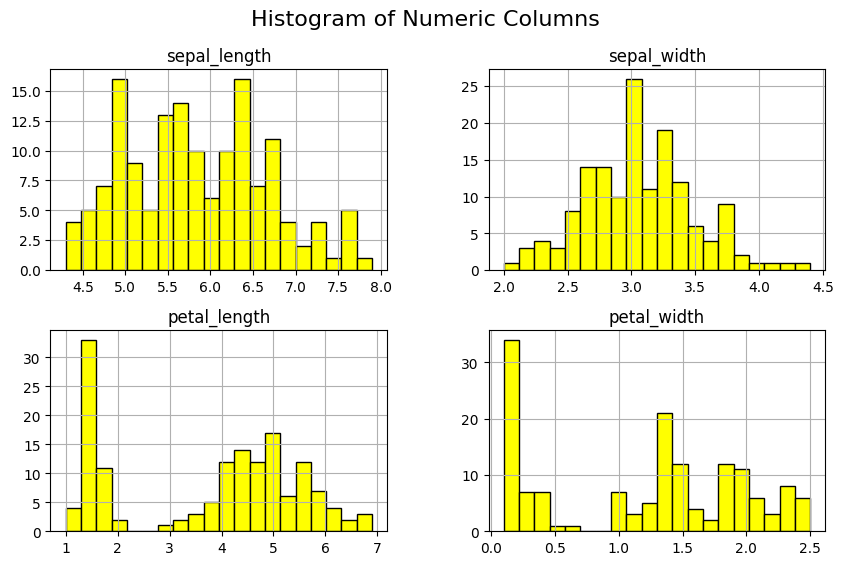

In [8]:
plt.figure(figsize=(10,6))
data.hist(bins=20 , figsize=(10,6) , color='yellow', edgecolor='black')
plt.suptitle('Histogram of Numeric Columns', fontsize=16)
plt.show()

In [9]:
corr = data.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


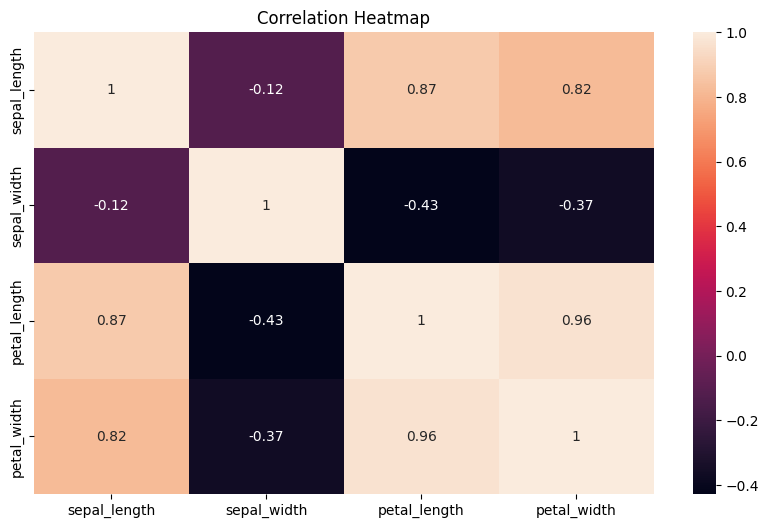

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

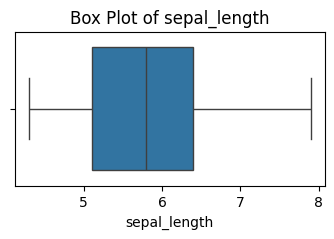

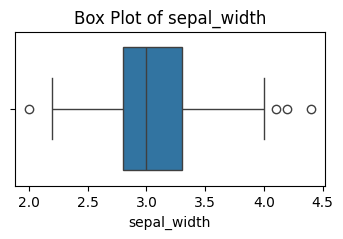

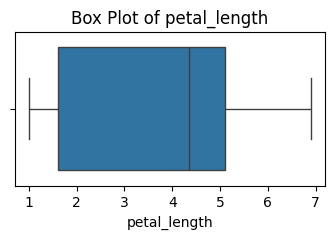

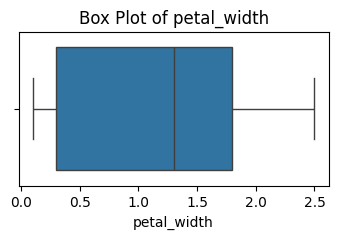

In [11]:
import seaborn as sns
for col in data:
  plt.figure(figsize=(4,2))
  sns.boxplot(x=data[col])
  plt.title(f'Box Plot of {col}')
  plt.show()

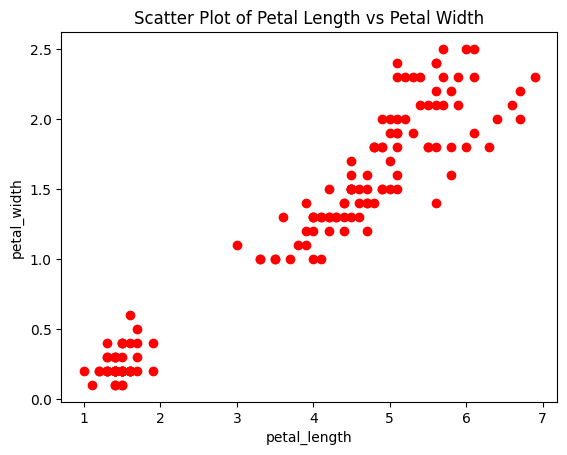

In [12]:
x = data[['petal_length', 'petal_width']]

plt.scatter(x['petal_length'], x['petal_width'], color = 'red')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x)

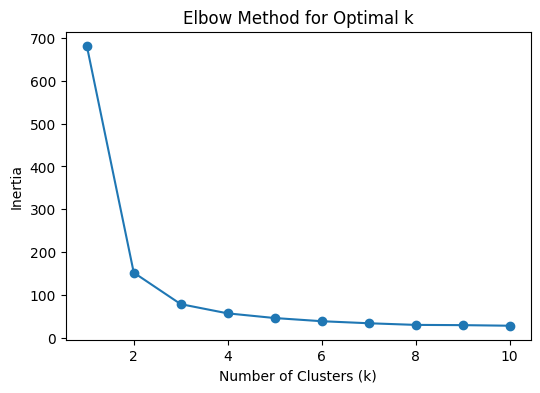

In [14]:

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [15]:
data1 = data.copy()

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data1)
data1['Cluster'] = kmeans.labels_

data1.head()


,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


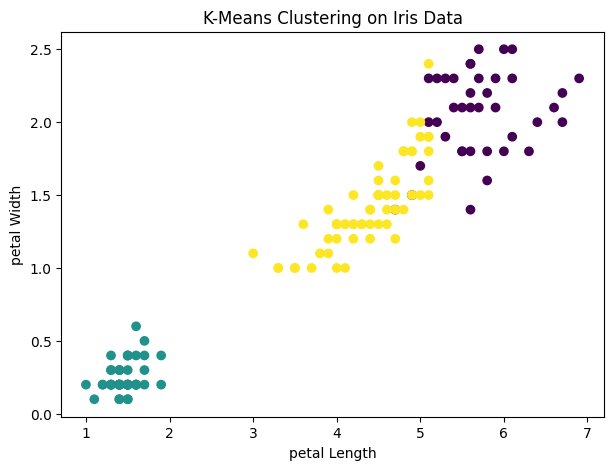

In [17]:
plt.figure(figsize=(7,5))
plt.scatter(data1['petal_length'], data1['petal_width'], c=data1['Cluster'], cmap='viridis')
plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.title('K-Means Clustering on Iris Data')
plt.show()


In [18]:
data1['Cluster'].value_counts()

,count
Cluster,
2,61
1,50
0,39


In [19]:
kmeans.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [20]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [21]:
cluster_summary = data1.groupby('Cluster')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()
print(cluster_summary)

         sepal_length  sepal_width  petal_length  petal_width
Cluster                                                      
0            6.853846     3.076923      5.715385     2.053846
1            5.006000     3.428000      1.462000     0.246000
2            5.883607     2.740984      4.388525     1.434426


In [22]:
cluster_labels = {0: 'virginica', 1: 'setosa', 2: 'versicolor'}
data1['Cluster Name'] = data1['Cluster'].map(cluster_labels)

In [23]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(data_scaled)
score = silhouette_score(data_scaled, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.5675406597587006


In [24]:
import numpy as np
new_iris = pd.DataFrame([[1.8, 1.2]],columns=['petal_length', 'petal_width'])
new_iris_scaled = scaler.transform(new_iris)
new_iris_cluster = kmeans.predict(new_iris_scaled)
print('Predicted Cluster:', new_iris_cluster[0])

Predicted Cluster: 2


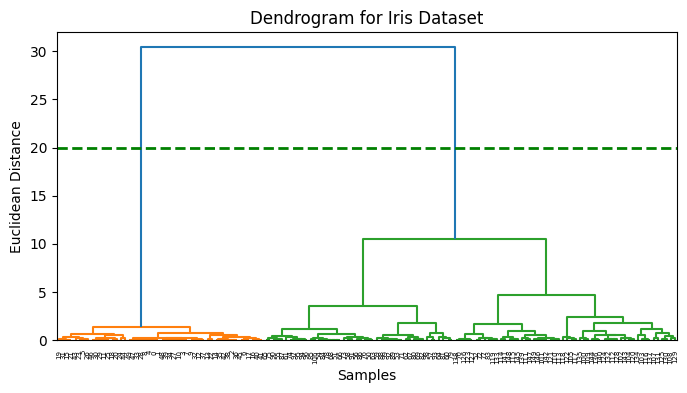

In [25]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
mergings = linkage(x, method='ward')
plt.figure(figsize=(8, 4))
dendrogram(mergings)
plt.title('Dendrogram for Iris Dataset')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.axhline(y=20, color='green', linestyle='--', linewidth=2)
plt.show()


In [26]:
from sklearn.cluster import AgglomerativeClustering
agg_hc=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
new_cluster_labels=agg_hc.fit_predict(data_scaled)


In [27]:
score=silhouette_score(data_scaled,new_cluster_labels)
print('Silhouette Score:',score)

Silhouette Score: 0.609944142866424


In [28]:
agg_hc=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
new_cluster_labels=agg_hc.fit_predict(data_scaled)


In [29]:
score=silhouette_score(data_scaled,new_cluster_labels)
print('Silhouette Score:',score)

Silhouette Score: 0.743371950414545


In [30]:
data1['agg_hc_Clusters']=new_cluster_labels

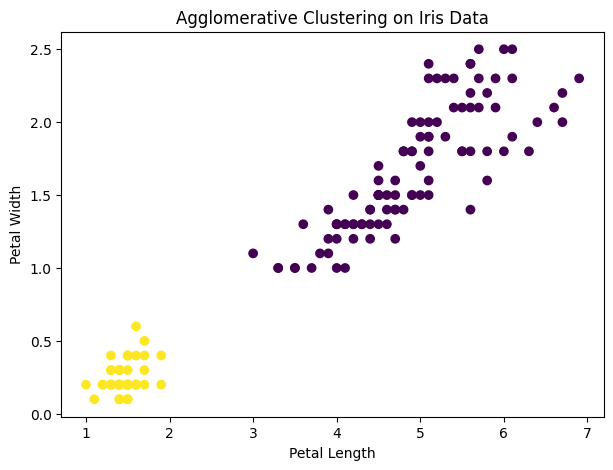

In [31]:
plt.figure(figsize=(7,5))
plt.scatter(
    data1['petal_length'],
    data1['petal_width'],
    c=data1['agg_hc_Clusters'],
    cmap='viridis'
)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Agglomerative Clustering on Iris Data')
plt.show()


In [32]:
data1['agg_hc_Clusters'].value_counts()

,count
agg_hc_Clusters,
0,100
1,50


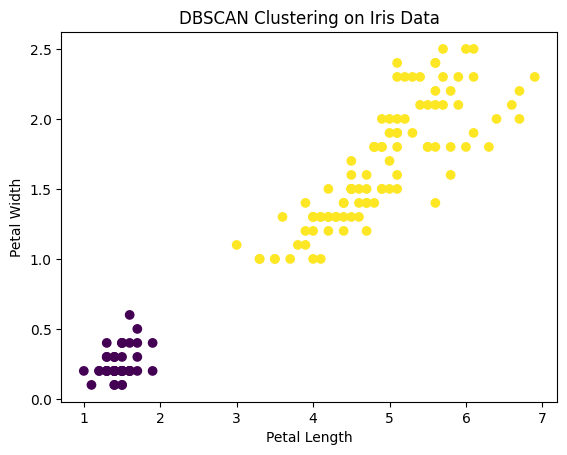

In [33]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=10)
data1['Cluster_DBSCAN'] = db.fit_predict(data_scaled)

plt.scatter(data1['petal_length'], data1['petal_width'], c=data1['Cluster_DBSCAN'], cmap='viridis')
plt.title('DBSCAN Clustering on Iris Data')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


In [34]:
from sklearn.metrics import silhouette_score

labels = data1['Cluster_DBSCAN']
score = silhouette_score(data_scaled, labels)
print("Silhouette Score :", score)



Silhouette Score : 0.743371950414545


In [35]:
data1['Cluster_DBSCAN'].value_counts()

,count
Cluster_DBSCAN,
1,100
0,50


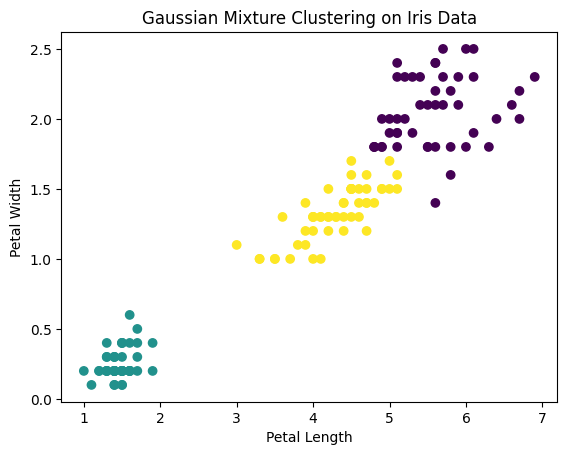

In [36]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
data1['Cluster_GMM'] = gmm.fit_predict(x)

plt.scatter(data1['petal_length'], data1['petal_width'], c=data1['Cluster_GMM'], cmap='viridis')
plt.title('Gaussian Mixture Clustering on Iris Data')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


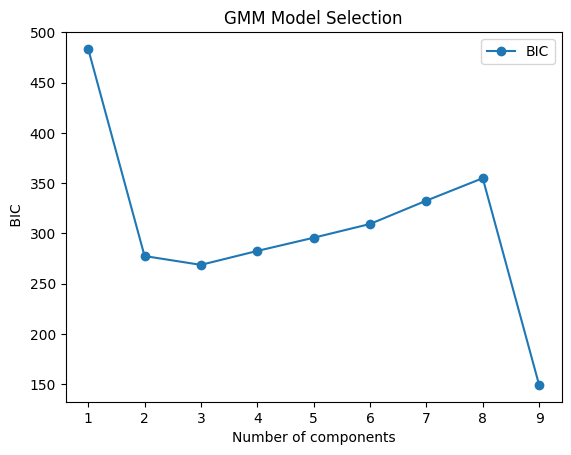

In [37]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

K = range(1, 10)
bic = []

for k in K:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(data_scaled)
    bic.append(gmm.bic(data_scaled))


plt.plot(K, bic, label='BIC', marker='o')
plt.xlabel('Number of components')
plt.ylabel(' BIC')
plt.title('GMM Model Selection')
plt.legend()
plt.show()


In [38]:
from sklearn.metrics import silhouette_score

labels = data1['Cluster_GMM']
score = silhouette_score(data_scaled, labels)
print("Silhouette Score :", score)

Silhouette Score : 0.6703017569212029


In [39]:
data1['Cluster_GMM'].value_counts()


,count
Cluster_GMM,
2,52
1,50
0,48


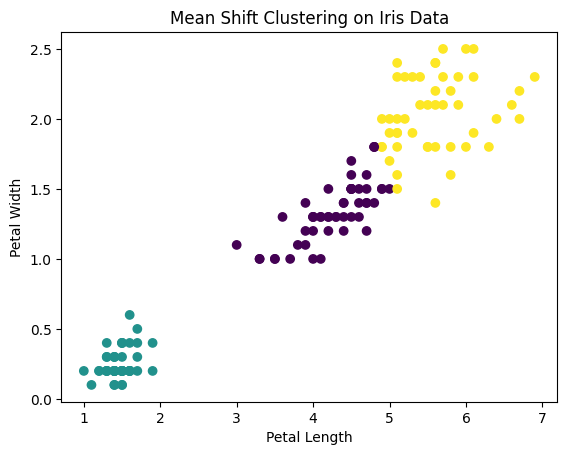

In [40]:
from sklearn.cluster import MeanShift

ms = MeanShift()
data1['Cluster_MS'] = ms.fit_predict(x)

plt.scatter(data['petal_length'], data1['petal_width'], c=data1['Cluster_MS'], cmap='viridis')
plt.title('Mean Shift Clustering on Iris Data')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


In [41]:
from sklearn.metrics import silhouette_score

labels = data1['Cluster_MS']
score = silhouette_score(data_scaled, labels)
print("Silhouette Score :", score)

Silhouette Score : 0.6555236613157415


In [42]:
data1['Cluster_MS'].value_counts()

,count
Cluster_MS,
0,52
1,50
2,48


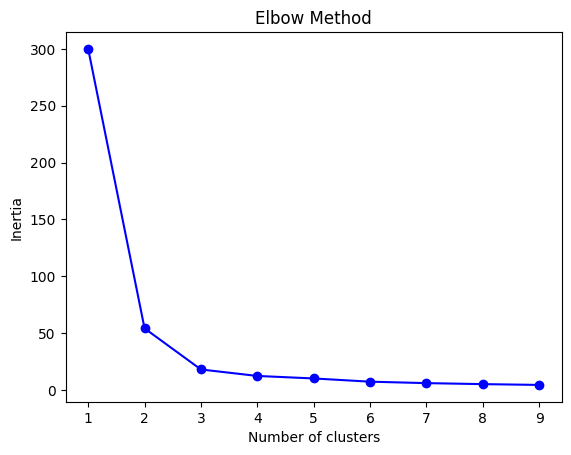

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


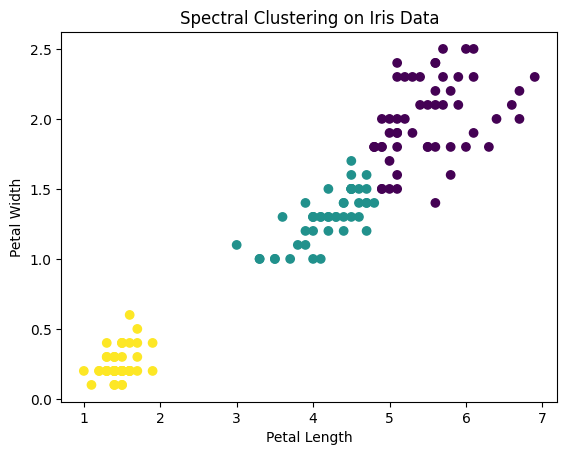

In [44]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
data1['Cluster_SC'] = sc.fit_predict(x)

plt.scatter(data1['petal_length'], data1['petal_width'], c=data1['Cluster_SC'], cmap='viridis')
plt.title('Spectral Clustering on Iris Data')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


In [45]:
data1['Cluster_SC'].value_counts()

,count
Cluster_SC,
0,54
2,50
1,46


In [46]:
from sklearn.metrics import silhouette_score

labels = data1['Cluster_SC']
score = silhouette_score(data_scaled, labels)
print("Silhouette Score :", score)

Silhouette Score : 0.6516041795610216
